OS utilities for interacting with the system,  OpenCV for image processing. NumPy and Pandas are imported for numerical operations and data manipulation. Matplotlib is used for visualizations,  Tqdm enables progress bars for loops, and Zipfile is for working with zip files

In [47]:
from google.colab import files
import os
import cv2
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from tqdm import tqdm
import zipfile

Specifies the path for a zip file and a folder to extract it .

In [52]:
# Define dataset and extraction paths
dataset_zip = 'CV_Ass.zip'
extraction_path = '/content/CV_Ass/Animals'
os.makedirs(extraction_path, exist_ok=True)

In [53]:
# Extracting the zip
with zipfile.ZipFile(dataset_zip, 'r') as archive:
    archive.extractall(extraction_path)
print(f"Dataset extracted to {extraction_path}")

Dataset extracted to /content/CV_Ass/Animals


In [54]:
# List all categories
categories = os.listdir(extraction_path)
print("Categories found:", categories)

Categories found: ['Leopard', 'Jaguar', 'Cheetah', 'Animals', 'Tiger', 'Lion']


Loops through each category in categories, creates the folder path for each category, assigns a label based on the category's index, and prints a message indicating the category and its label.

In [55]:
# training data
training_data = []
for category in categories:
    category_path = os.path.join(extraction_path, category)
    label = categories.index(category)
    print(f"Processing {category} with label {label}")

Processing Leopard with label 0
Processing Jaguar with label 1
Processing Cheetah with label 2
Processing Animals with label 3
Processing Tiger with label 4
Processing Lion with label 5


Loads and processes images from each category, resizing them to 256x256 pixels and appending them to training_data with their corresponding labels. It handles errors by skipping problematic images and displays a progress bar for each category. Finally, it prints the total number of images loaded.

In [56]:
# Prepare training data
training_data = []
for category in categories:
    category_path = os.path.join(extraction_path, category)
    label = categories.index(category)
    print(f"Processing {category} with label {label}")


    for image_name in tqdm(os.listdir(category_path), desc=f"Loading {category} images"):
        try:
            image_path = os.path.join(category_path, image_name)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            if image is None:
                raise ValueError(f"Could not read image: {image_name}")

            # Resize images
            resized_image = cv2.resize(image, (256, 256))
            training_data.append([resized_image, label])
        except Exception as error:
            print(f"Skipping {image_name} due to error: {error}")

print(f"Total images loaded: {len(training_data)}")

Processing Leopard with label 0


Loading Leopard images: 100%|██████████| 31/31 [00:00<00:00, 426.80it/s]


Processing Jaguar with label 1


Loading Jaguar images: 100%|██████████| 30/30 [00:00<00:00, 401.37it/s]


Processing Cheetah with label 2


Loading Cheetah images: 100%|██████████| 38/38 [00:00<00:00, 399.66it/s]


Processing Animals with label 3


Loading Animals images: 100%|██████████| 5/5 [00:00<00:00, 7822.28it/s]


Skipping Leopard due to error: Could not read image: Leopard
Skipping Jaguar due to error: Could not read image: Jaguar
Skipping Cheetah due to error: Could not read image: Cheetah
Skipping Tiger due to error: Could not read image: Tiger
Skipping Lion due to error: Could not read image: Lion
Processing Tiger with label 4


Loading Tiger images: 100%|██████████| 39/39 [00:00<00:00, 419.98it/s]


Processing Lion with label 5


Loading Lion images: 100%|██████████| 32/32 [00:00<00:00, 474.62it/s]

Total images loaded: 170


Random selection of 100 images from the training_data. It first shuffles the data, then creates a 10x10 grid using Matplotlib to display the images. Each image is shown in grayscale, with its corresponding label as the title. The axis labels are turned off for better visualization. Finally, the layout is adjusted to ensure proper spacing, and the images are displayed using plt.show().

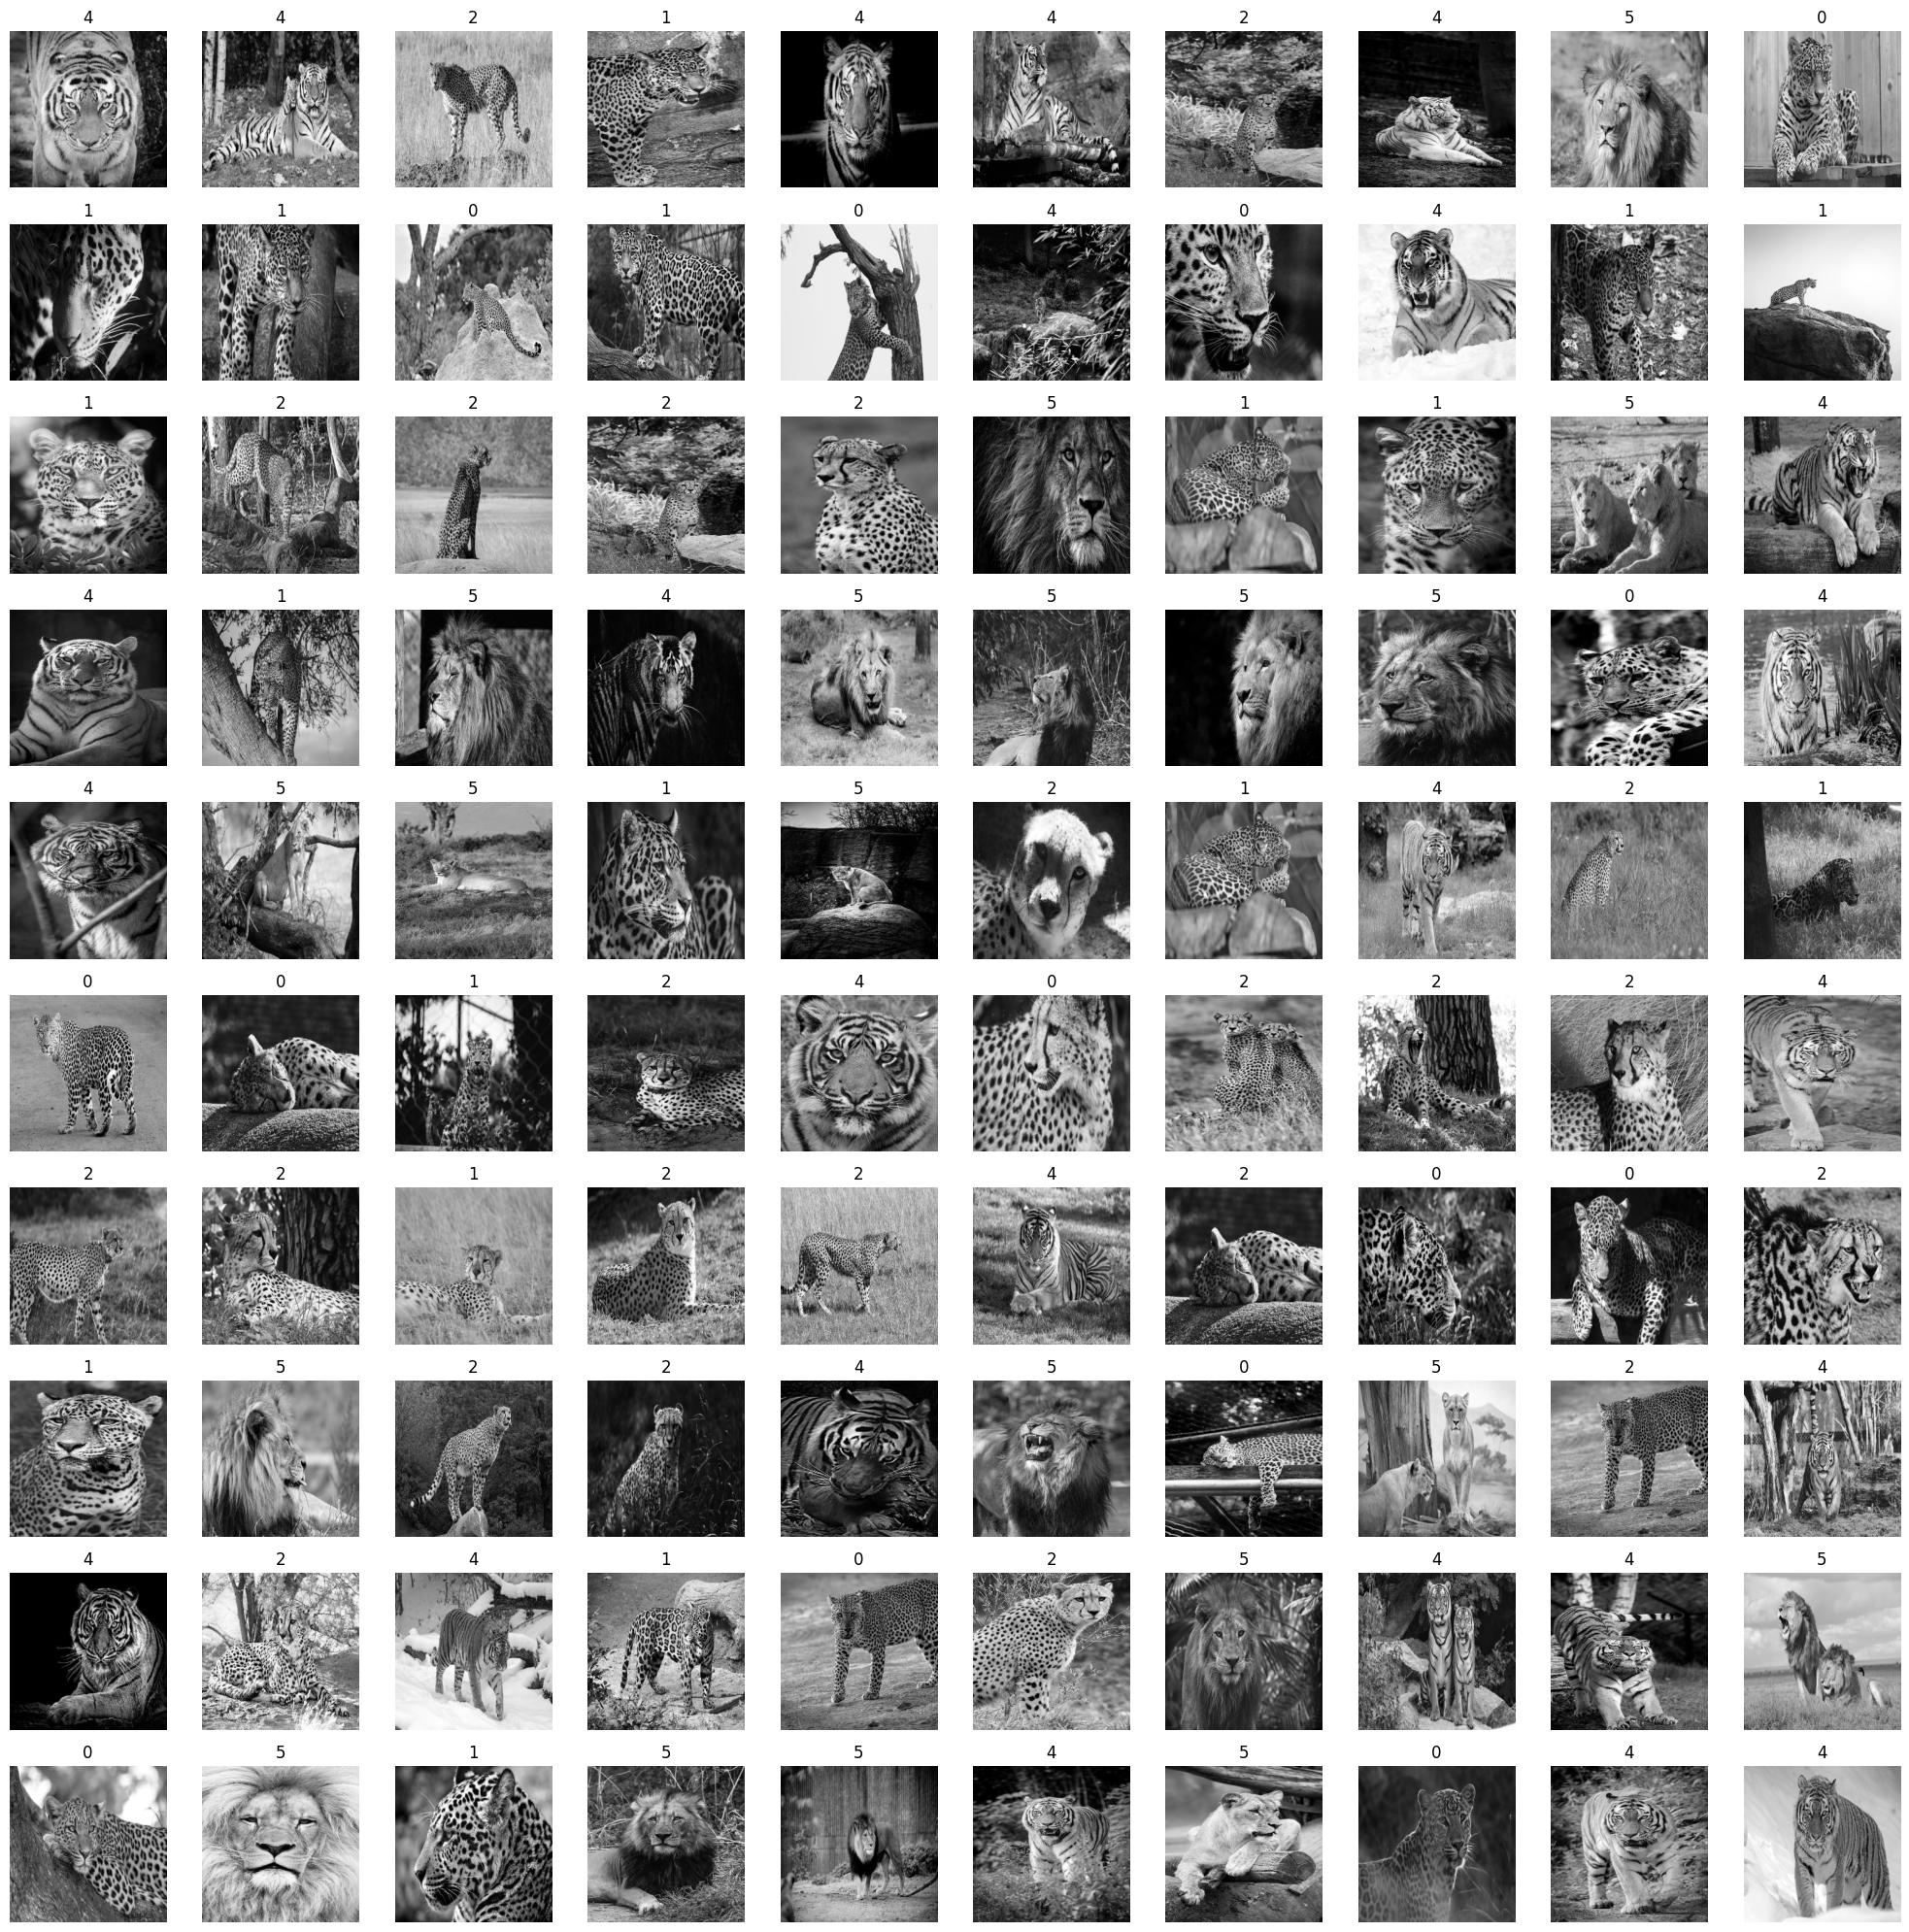

In [57]:
# Visualize
random.shuffle(training_data)
plt.figure(figsize=(20, 20))
for i in range(100):
    plt.subplot(10, 10, i + 1)
    plt.imshow(training_data[i][0], cmap='gray')
    plt.axis('off')
    plt.title(training_data[i][1])
plt.tight_layout()
plt.show()


Shuffled training_data into 5 folds for cross-validation. It defines a calculate_distance function to compute the Euclidean distance between two images by flattening them and calculating the difference.

In [58]:
# folds for cross-validation
random.shuffle(training_data)
k_folds = 5
fold_size = len(training_data) // k_folds
folds = [training_data[i * fold_size:(i + 1) * fold_size] for i in range(k_folds)]

# Euclidean distance
def calculate_distance(img1, img2):
    try:
        return np.linalg.norm(img1.flatten() - img2.flatten())
    except Exception as e:
        print(f"Error computing distance: {e}")
        return float('inf')


 k-NN classification with cross-validation, evaluating different k values 1 to 30. For each fold, it calculates the accuracy by predicting labels based on the knearest neighbors and stores the results for each k.

In [64]:
# k-NN classification with cross-validation
k_values = range(1, 31)
validation_results = {k: [] for k in k_values}

for k in k_values:
    print(f"Evaluating k={k}")
    for fold_idx in range(k_folds):

        validation_set = folds[fold_idx]
        training_set = [data for idx, fold in enumerate(folds) if idx != fold_idx for data in fold]

        correct_count = 0
        for val_image, val_label in validation_set:
            distances = [
                (calculate_distance(val_image, train_image), train_label)
                for train_image, train_label in training_set
            ]
            distances.sort(key=lambda x: x[0])


            nearest_labels = [label for _, label in distances[:k]]
            predicted_label = max(set(nearest_labels), key=nearest_labels.count)

            if predicted_label == val_label:
                correct_count += 1

        # Calculate accuracy for the current fold
        if len(validation_set) > 0:
            accuracy = correct_count / len(validation_set) * 100
            validation_results[k].append(accuracy)
            print(f"Fold {fold_idx + 1}: Accuracy = {accuracy:.2f}%")
        else:
            print(f"Fold {fold_idx + 1} has no validation samples.")
    print("-" * 40)

Evaluating k=1
Fold 1: Accuracy = 17.65%
Fold 2: Accuracy = 20.59%
Fold 3: Accuracy = 23.53%
Fold 4: Accuracy = 23.53%
Fold 5: Accuracy = 29.41%
----------------------------------------
Evaluating k=2
Fold 1: Accuracy = 17.65%
Fold 2: Accuracy = 23.53%
Fold 3: Accuracy = 14.71%
Fold 4: Accuracy = 32.35%
Fold 5: Accuracy = 20.59%
----------------------------------------
Evaluating k=3
Fold 1: Accuracy = 20.59%
Fold 2: Accuracy = 26.47%
Fold 3: Accuracy = 17.65%
Fold 4: Accuracy = 23.53%
Fold 5: Accuracy = 29.41%
----------------------------------------
Evaluating k=4
Fold 1: Accuracy = 17.65%
Fold 2: Accuracy = 26.47%
Fold 3: Accuracy = 14.71%
Fold 4: Accuracy = 23.53%
Fold 5: Accuracy = 29.41%
----------------------------------------
Evaluating k=5
Fold 1: Accuracy = 29.41%
Fold 2: Accuracy = 29.41%
Fold 3: Accuracy = 17.65%
Fold 4: Accuracy = 23.53%
Fold 5: Accuracy = 26.47%
----------------------------------------
Evaluating k=6
Fold 1: Accuracy = 26.47%
Fold 2: Accuracy = 32.35%
Fol

In [65]:
if len(validation_set) > 0:
    accuracy = correct_count / len(validation_set) * 100
    validation_results[k].append(accuracy)
    print(f"Fold {fold_idx + 1}: Accuracy = {accuracy:.2f}%")
else:
    print(f"Fold {fold_idx + 1} has no validation samples.")


Fold 5: Accuracy = 32.35%


In [75]:
import matplotlib.pyplot as plt
print(plt.style.available)


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


Visualizes k-NN cross-validation results by plotting validation accuracies for different k values and showing the average accuracy as a red line. It customizes the plot with colors, labels, and annotations to explain the graph.

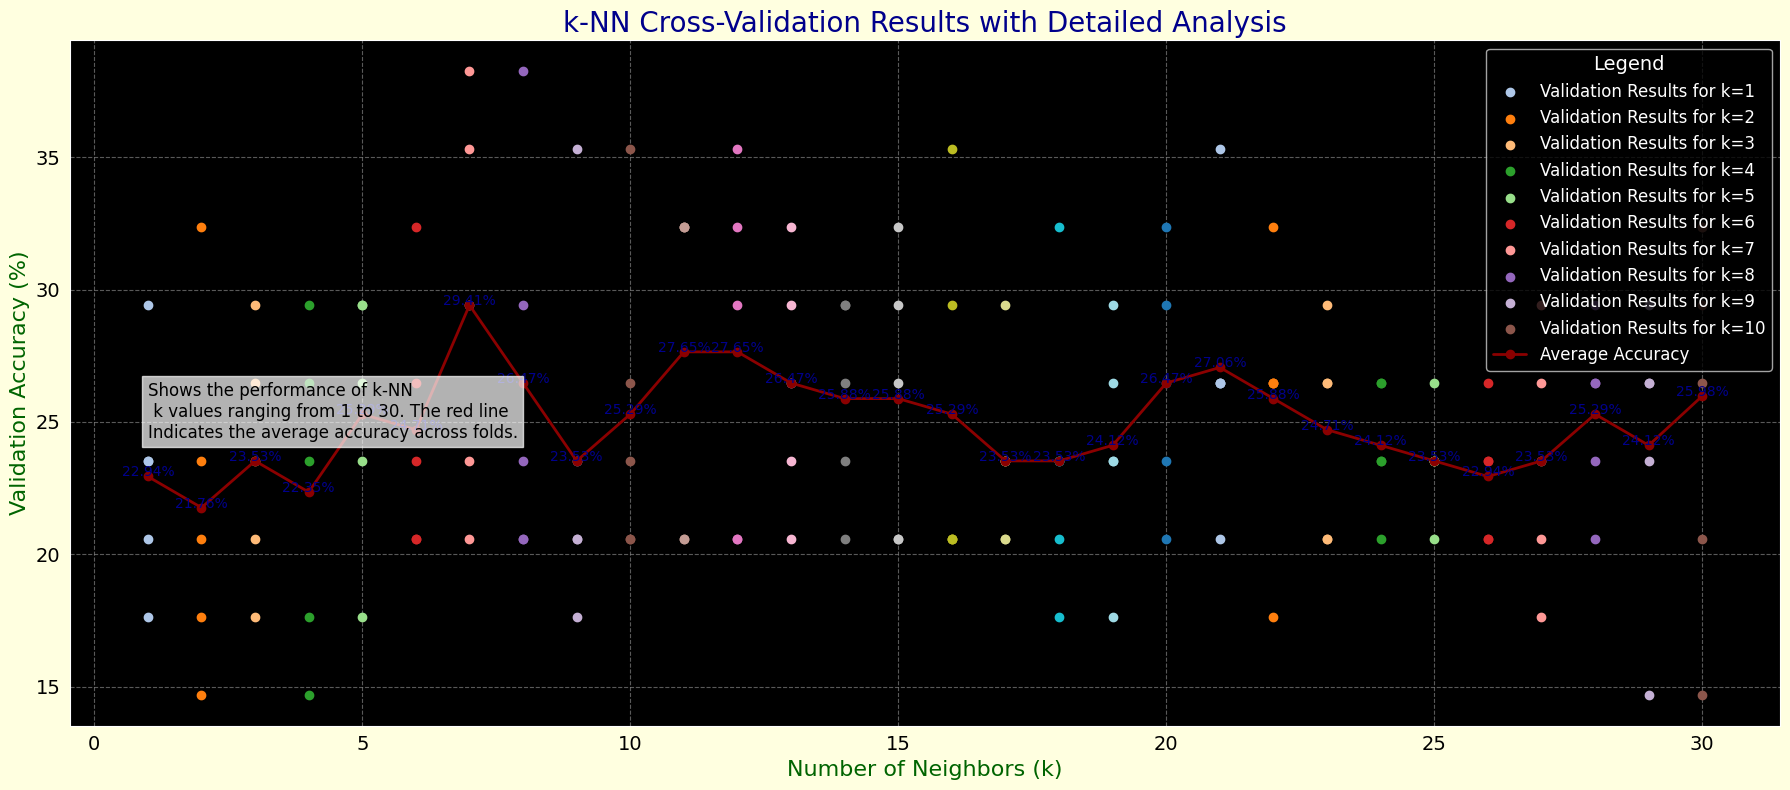

In [78]:

import matplotlib.pyplot as plt


plt.figure(figsize=(18, 8))


plt.gcf().set_facecolor('lightyellow')

# Color palette
colors = plt.cm.tab20.colors


for k in k_values:
    plt.scatter(
        [k] * len(validation_results[k]),
        validation_results[k],
        color=colors[k % len(colors)],
        label=f"Validation Results for k={k}" if k <= 10 else ""
    )

# Plot
plt.plot(
    k_values, average_accuracies,
    color='darkred', linewidth=2, marker='o', markersize=6, label='Average Accuracy'
)


plt.grid(alpha=0.7, color='gray', linestyle='--')


plt.title('k-NN Cross-Validation Results with Detailed Analysis', fontsize=20, color='darkblue')
plt.xlabel('Number of Neighbors (k)', fontsize=16, color='darkgreen')
plt.ylabel('Validation Accuracy (%)', fontsize=16, color='darkgreen')


for k, avg_acc in zip(k_values, average_accuracies):
    plt.text(k, avg_acc, f"{avg_acc:.2f}%", fontsize=10, color='darkblue', ha='center')

plt.xticks(fontsize=14, color='black')
plt.yticks(fontsize=14, color='black')


plt.legend(fontsize=12, loc='upper right', title="Legend", title_fontsize=14)


plt.text(
    1, max(average_accuracies) - 5,
    "Shows the performance of k-NN\n"
    " k values ranging from 1 to 30. The red line\n"
    "Indicates the average accuracy across folds.",
    fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.7)
)


plt.tight_layout()


plt.show()
